In [15]:
import pandas as pd
import numpy as np
from pandas.compat import lmap
import matplotlib.pyplot as plt
import seaborn as sns

def autocorrelation_plot(series, n_samples=None, ax=None, **kwds):
    """Autocorrelation plot for time series.

    Parameters:
    -----------
    series: Time series
    ax: Matplotlib axis object, optional
    kwds : keywords
        Options to pass to matplotlib plotting method

    Returns:
    -----------
    ax: Matplotlib axis object
    """
    import matplotlib.pyplot as plt
    n = len(series)
    data = np.asarray(series)
    if ax is None:
        ax = plt.gca(xlim=(1, n_samples), ylim=(-1.0, 1.0))
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        return ((data[:n - h] - mean) *
                (data[h:] - mean)).sum() / float(n) / c0
    x = (np.arange(n) + 1).astype(int)
    y = lmap(r, x)
    z95 = 1.959963984540054
    z99 = 2.5758293035489004
    ax.axhline(y=z99 / np.sqrt(n), linestyle='--', color='grey')
    ax.axhline(y=z95 / np.sqrt(n), color='grey')
    ax.axhline(y=0.0, color='black')
    ax.axhline(y=-z95 / np.sqrt(n), color='grey')
    ax.axhline(y=-z99 / np.sqrt(n), linestyle='--', color='grey')
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    if n_samples:
        ax.plot(x[:n_samples], y[:n_samples], **kwds)
    else:
        ax.plot(x, y, **kwds)
    if 'label' in kwds:
        ax.legend()
    ax.grid()
    return ax
def autocorr(x):
    n = x.size
    norm = (x - np.mean(x))
    result = np.correlate(norm, norm, mode='same')
    acorr = result[n//2 + 1:] / (x.var() * np.arange(n-1, n//2, -1))
    lag = np.abs(acorr).argmax() + 1
    r = acorr[lag-1]        
    if np.abs(r) > 0.5:
      print('Appears to be autocorrelated with r = {}, lag = {}'. format(r, lag))
    else: 
      print('Appears to be not autocorrelated')
    return r, lag




In [111]:
droughts=pd.read_csv('droughts.csv')

In [112]:
water_usage=pd.read_csv('water_usage.csv')
water_usage=water_usage[water_usage['year']==2010]

In [118]:
droughts['date']=pd.to_datetime(droughts['valid_end'])

In [114]:
droughts['year']=droughts.date.dt.year

In [119]:
merge=droughts.merge(water_usage,left_on=['fips'],right_on=['fips'],how='inner')
merge['state']=merge['state_x']
merge['county']=merge['county_x']
merge['year']=merge['year_x']
del(merge['state_y'])
del(merge['county_y'])
del(merge['state_x'])
del(merge['county_x'])
del(merge['year_x'])
del(merge['year_y'])

In [124]:
merge=merge[(merge['year']>2010)&(merge['year']<2015)]
len(merge)

672144

In [121]:
col_list=list(merge.columns.values)
col_list

['fips',
 'none',
 'd0',
 'd1',
 'd2',
 'd3',
 'd4',
 'valid_start',
 'valid_end',
 'date',
 'state_fips',
 'county_fips',
 'population',
 'pub_sup_1',
 'pub_sup_2',
 'pub_sup_3',
 'pub_sup_4',
 'pub_sup_5',
 'pub_sup_6',
 'pub_sup_7',
 'pub_sup_8',
 'pub_sup_9',
 'pub_sup_10',
 'pub_sup_11',
 'pub_sup_12',
 'dom_sup_1',
 'dom_sup_2',
 'dom_sup_3',
 'dom_sup_4',
 'dom_sup_5',
 'dom_sup_6',
 'dom_sup_7',
 'dom_sup_8',
 'ind_1',
 'ind_2',
 'ind_3',
 'ind_4',
 'ind_5',
 'ind_6',
 'ind_7',
 'ind_8',
 'ind_9',
 'irrigation_1',
 'irrigation_2',
 'irrigation_3',
 'irrigation_4',
 'irrigation_5',
 'irrigation_6',
 'irrigation_7',
 'crop_1',
 'crop_2',
 'crop_3',
 'crop_4',
 'crop_5',
 'crop_6',
 'crop_7',
 'golf_1',
 'golf_2',
 'golf_3',
 'golf_4',
 'golf_5',
 'golf_6',
 'golf_7',
 'livestock_1',
 'livestock_2',
 'livestock_3',
 'aqua_1',
 'aqua_2',
 'aqua_3',
 'aqua_4',
 'aqua_5',
 'aqua_6',
 'aqua_7',
 'aqua_8',
 'aqua_9',
 'mining_1',
 'mining_2',
 'mining_3',
 'mining_4',
 'mining_5',
 'mi

In [47]:
#a=droughts[droughts['none']==100]
#aa=droughts.drop(a.index)
#california
#len(aa)

length=52
auto_gpby_list=[]
for i in range(1,length+1):
    print(i)
    def df_autocorr(df):
        lag=i
        axis=0
        """Compute full-sample column-wise autocorrelation for a DataFrame."""
        #return df.apply(lambda col: col.autocorr(lag), axis=axis)
        return df.apply(lambda col: col.autocorr(lag))

    auto_gpby_list.append(droughts.groupby('fips')[['none','d0','d1','d2','d3','d4']].apply(df_autocorr))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


In [40]:
auto_gpby_list[0].head()

,none,d0,d1,d2,d3,d4
fips,,,,,,
1001,0.900615,0.792416,0.811994,0.787235,0.846301,NaN
1003,0.889535,0.754276,0.854555,0.808659,0.785882,0.768372
1005,0.924384,0.816283,0.753073,0.905808,0.942767,0.912636
1007,0.910035,0.740478,0.818719,0.814942,0.714539,0.766186
1009,0.905325,0.711176,0.799625,0.871034,0.715845,0.922439


In [41]:
auto_gpby_list[1].head()

,none,d0,d1,d2,d3,d4
fips,,,,,,
1001,0.797171,0.590577,0.637484,0.561229,0.660757,NaN
1003,0.781615,0.526017,0.717902,0.679866,0.597362,0.488254
1005,0.856076,0.643758,0.575193,0.844304,0.903185,0.855867
1007,0.819830,0.600350,0.696897,0.661724,0.536975,0.525511
1009,0.810181,0.456772,0.608465,0.726973,0.398987,0.823262


In [33]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [58]:
resp_list=['none','d0','d1','d2','d3','d4']
avg_auto_list=[]
for lag in range(length):
    tmp={}
    for col in resp_list:
        #print 'average autocorrelation of '+col+': '+  str(gpby[each].mean(axis=0))
        tmp[col]=auto_gpby_list[lag][col].mean(axis=0)
        
    avg_auto_list.append(tmp)


In [61]:
average_auto_df=pd.DataFrame(avg_auto_list)
average_auto_df.index=average_auto_df.index+1

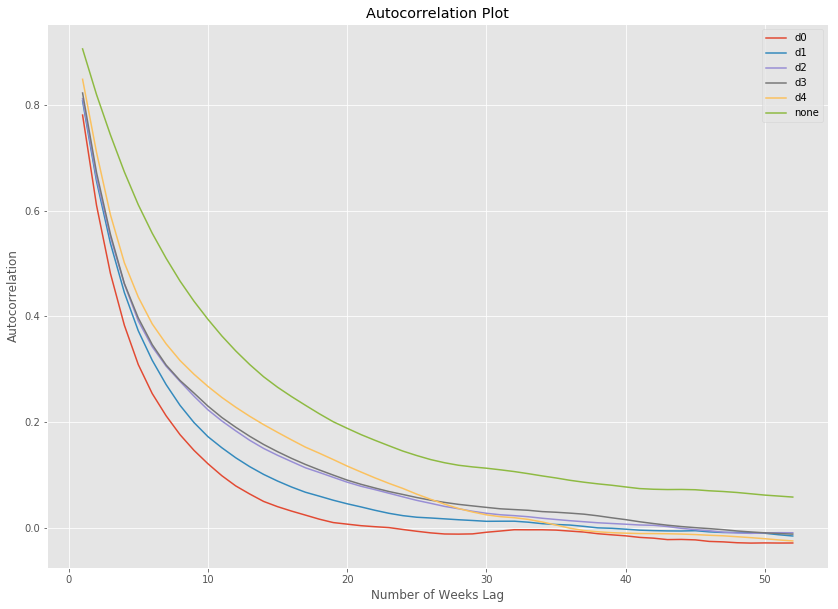

In [71]:

#df.plot(color=[color_dict.get(x, '#333333') for x in df.columns])
plt.style.use('ggplot')
ax=average_auto_df.plot(figsize=(14,10))
ax.set_ylabel("Autocorrelation")
ax.set_xlabel("Number of Weeks Lag")
plt.title('Autocorrelation Plot')
plt.show()

In [6]:
alaska=droughts[droughts['fips']==2013]

alaska

,fips,county,state,none,d0,d1,d2,d3,d4,valid_start,valid_end
0,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-12-26,2018-01-01
1,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-12-19,2017-12-25
2,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-12-12,2017-12-18
3,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-12-05,2017-12-11
4,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-11-28,2017-12-04
5,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-11-21,2017-11-27
6,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-11-14,2017-11-20
7,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-11-07,2017-11-13
8,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-10-31,2017-11-06
9,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2017-10-24,2017-10-30


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


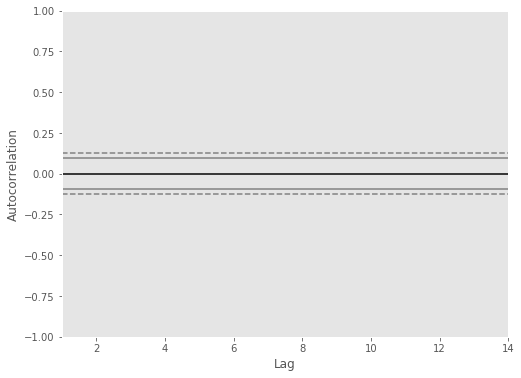

In [9]:
plt.figure(1,figsize=(8, 6))
plt.style.use('ggplot')
autocorrelation_plot(alaska['none'],n_samples=14)
